## Stocks Buying Strategy (Based on Daily Price Change)
This strategy is to :
1. Buy one share of certain stocks if the stocks price falls more than a certain percentage (pct change of closing price)
2. Hold all the shares till today
3. Evaluate the gain or loss.

## Disclaimer : 
This is a dumbass strategy and I'm not recommending anyone to follow it, this whole notebook is just a toy.

### 1. First thing first, import necessary libraries, some may not be used though...

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import quandl 
import datetime
from matplotlib import pyplot as plt

### 2. Get the stocks price data and work with it

In [2]:
df = data.DataReader('BTC-USD', 
                     'yahoo', 
                     start=datetime.datetime(2021,3,8), 
                     end=datetime.date.today()) # choose a stock and time frame

In [3]:
df['Ytd Close'] = df.Close.shift(1) 
df['Diff'] = df.Open - df.Close
df['Closing Price Pct Change'] = df.Close.pct_change() # daily price percentage change
# data = data.iloc[1:, :] # remove the first row
df

,High,Low,Open,Close,Volume,Adj Close,Ytd Close,Diff,Closing Price Pct Change
Date,,,,,,,,,
2021-03-07,51384.367188,48918.679688,48918.679688,51206.691406,43137459378,51206.691406,NaN,-2288.011719,NaN
2021-03-08,52314.070312,49506.054688,51174.117188,52246.523438,48597428048,52246.523438,51206.691406,-1072.406250,0.020307
2021-03-09,54824.117188,51981.832031,52272.968750,54824.117188,50912227385,54824.117188,52246.523438,-2551.148438,0.049335
2021-03-10,57258.253906,53290.890625,54824.011719,56008.550781,57295577614,56008.550781,54824.117188,-1184.539062,0.021604
2021-03-11,58091.062500,54484.593750,55963.179688,57805.121094,56772343595,57805.121094,56008.550781,-1841.941406,0.032077
...,...,...,...,...,...,...,...,...,...
2021-08-18,46970.761719,43998.316406,44741.882812,46717.578125,37204312299,46717.578125,44801.187500,-1975.695312,0.042775
2021-08-19,49342.152344,46650.707031,46723.121094,49339.175781,34706867452,49339.175781,46717.578125,-2616.054688,0.056116
2021-08-20,49717.019531,48312.199219,49327.074219,48905.492188,40585205312,48905.492188,49339.175781,421.582031,-0.008790


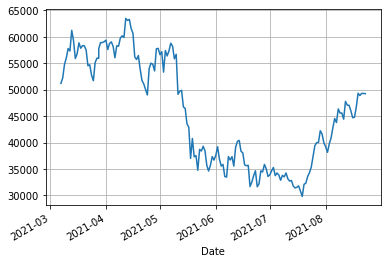

In [4]:
# plot the closing price
df['Close'].plot(grid=True)
plt.show()

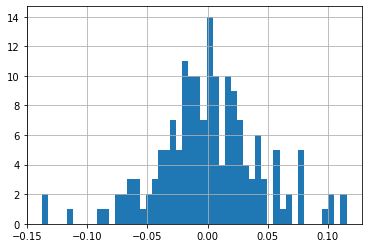

count    169.000000
mean       0.000669
std        0.042413
min       -0.137661
25%       -0.021816
50%        0.000189
75%        0.023227
max        0.115691
Name: Closing Price Pct Change, dtype: float64


In [5]:
# Plot the distribution of 'Close Price Pct Change'
df['Closing Price Pct Change'].hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(df['Closing Price Pct Change'].describe())

### 3. Let's create some helper functions before implementing the trading strategy

In [6]:
def pct_change(buy, sell):
    return (sell - buy) / buy

In [7]:
def mean(value, n):
    return value / n

### 4. The signal function

In [8]:
# produce a signal when to buy or sell the stocks
def signal(pct_change):
    if pct_change < -0.05: # choose a benchmark fall percentage
        return 'Buy'

### 5. Implement the strategy

In [9]:
mydate = []
mypctchange = []
myshares = []
mytotalshares = []
mybuyingprice = []
mytotalcost = []

for i, row in df.iterrows():
    if signal(row['Closing Price Pct Change']) == 'Buy':
        mydate.append(row.name)
        mypctchange.append(row['Closing Price Pct Change'])
        myshares.append(1)
        mytotalshares.append(sum(myshares))
        mybuyingprice.append(row['Open'])
        mytotalcost.append(sum(mybuyingprice))

# create my shares purchasing df
mydf = pd.DataFrame({'Date': mydate,
                     'Closing Price Pct Change': mypctchange,
                     'Daily Shares Bought': myshares,
                     'Total Shares': mytotalshares,
                     'Buying Price': mybuyingprice,
                     'Total Cost': mytotalcost})

#### 6. Results

In [10]:
# overall performance evaluation
myavgcost = mean(mytotalcost[-1], sum(myshares))
gainloss = pct_change(myavgcost, df['Open'][-1])
print('Total shares bought: ', sum(myshares))
print('Average cost: ', myavgcost)
print('Total cost:', mytotalcost[-1] * 8) # convert to your currency, mop in this case, which is to simply multiply by 8
print('Gain/Loss pct: {}%'.format(round(gainloss*100, 2)))

Total shares bought:  17
Average cost:  45347.87867647059
Total cost: 6167311.5
Gain/Loss pct: 8.83%


In [11]:
mydf

,Date,Closing Price Pct Change,Daily Shares Bought,Total Shares,Buying Price,Total Cost
0,2021-03-15,-0.057251,1,1,59267.429688,59267.429688
1,2021-03-22,-0.052053,1,2,57517.890625,116785.320312
2,2021-04-17,-0.073622,1,3,60701.886719,177487.207031
3,2021-05-03,-0.067600,1,4,57214.179688,234701.386719
4,2021-05-11,-0.133217,1,5,56714.531250,291415.917969
5,2021-05-14,-0.062556,1,6,49855.496094,341271.414062
6,2021-05-16,-0.062824,1,7,46415.898438,387687.312500
7,2021-05-18,-0.137661,1,8,42944.976562,430632.289062
8,2021-05-20,-0.085282,1,9,40596.949219,471229.238281
9,2021-05-22,-0.073689,1,10,37531.449219,508760.687500


In [12]:
df

,High,Low,Open,Close,Volume,Adj Close,Ytd Close,Diff,Closing Price Pct Change
Date,,,,,,,,,
2021-03-07,51384.367188,48918.679688,48918.679688,51206.691406,43137459378,51206.691406,NaN,-2288.011719,NaN
2021-03-08,52314.070312,49506.054688,51174.117188,52246.523438,48597428048,52246.523438,51206.691406,-1072.406250,0.020307
2021-03-09,54824.117188,51981.832031,52272.968750,54824.117188,50912227385,54824.117188,52246.523438,-2551.148438,0.049335
2021-03-10,57258.253906,53290.890625,54824.011719,56008.550781,57295577614,56008.550781,54824.117188,-1184.539062,0.021604
2021-03-11,58091.062500,54484.593750,55963.179688,57805.121094,56772343595,57805.121094,56008.550781,-1841.941406,0.032077
...,...,...,...,...,...,...,...,...,...
2021-08-18,46970.761719,43998.316406,44741.882812,46717.578125,37204312299,46717.578125,44801.187500,-1975.695312,0.042775
2021-08-19,49342.152344,46650.707031,46723.121094,49339.175781,34706867452,49339.175781,46717.578125,-2616.054688,0.056116
2021-08-20,49717.019531,48312.199219,49327.074219,48905.492188,40585205312,48905.492188,49339.175781,421.582031,-0.008790
